In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
print(tf.__version__)

1.10.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [35]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [18]:
train_images.shape


(60000, 28, 28)

In [19]:
train_labels.shape


(60000,)

In [20]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

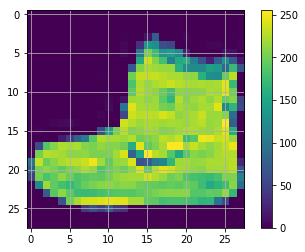

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(True)

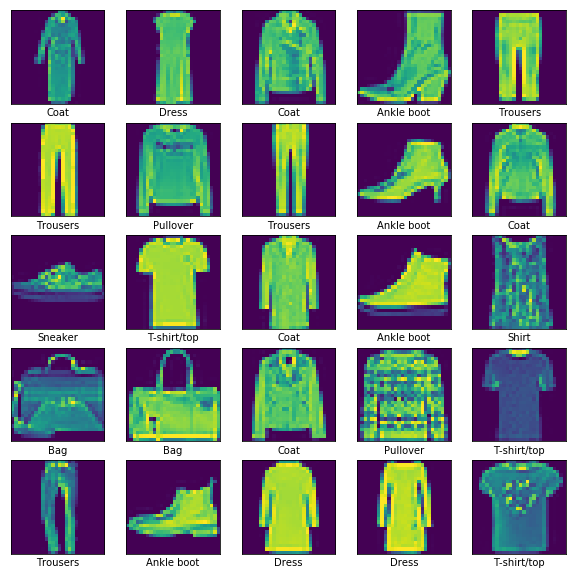

In [44]:
from random import randrange
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(1, 26):
    idx = randrange(60000)
    plt.subplot(5, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[idx]
#                , cmap=plt.cm.binary
              )
    plt.xlabel(class_names[train_labels[idx]])

0.9314941061569241